In [1]:
import pandas as pd

In [2]:
df_0 = pd.read_csv('cart.csv')
print(df_0)

         date    name  amount  price
0  2021-03-01  carrot     7.0   5.73
1  2021-03-01     egg    12.0   1.70
2  2021-03-01    milk     NaN   3.57
3  2021-03-01  potato     2.0    NaN
4         NaN  tomato     6.0   1.52
5  2021-03-02  potato     3.0   2.17
6  2021-03-03     NaN     5.0   3.68


In [4]:
df_0['amount']=df_0['amount'].astype('Int32')
print(df_0)

         date    name  amount  price
0  2021-03-01  carrot       7   5.73
1  2021-03-01     egg      12   1.70
2  2021-03-01    milk    <NA>   3.57
3  2021-03-01  potato       2    NaN
4         NaN  tomato       6   1.52
5  2021-03-02  potato       3   2.17
6  2021-03-03     NaN       5   3.68


In [5]:
df_0.isnull()

,date,name,amount,price
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,False,False,False
6,False,True,False,False


In [7]:
df_0.isnull().any(axis=1)

0    False
1    False
2     True
3     True
4     True
5    False
6     True
dtype: bool

In [9]:
df_1 = pd.read_csv('metrics.csv',parse_dates=['time'])
print(df_1.sample(10))

                      time name         value
75 2021-07-13 14:37:27.789  mem  2.274959e+08
38 2021-07-13 14:37:10.563  cpu  2.737000e+01
27 2021-07-13 14:37:04.821  cpu  2.952000e+01
81 2021-07-13 14:37:30.660  mem  2.274995e+08
2  2021-07-13 14:36:53.337  mem  2.275192e+08
79 2021-07-13 14:37:29.703  mem  2.275184e+08
71 2021-07-13 14:37:25.875  mem  2.274978e+08
25 2021-07-13 14:37:03.864  mem  2.275177e+08
56 2021-07-13 14:37:19.176  cpu  3.060000e+01
50 2021-07-13 14:37:16.305  cpu  2.954000e+01


In [12]:
df_1.groupby('name').describe()

value                                                                  \
     count          mean           std     min           25%           50%   
name                                                                         
CPU    1.0  3.040000e+01           NaN   30.40  3.040000e+01  3.040000e+01   
cpu   49.0  3.645633e+01  3.977927e+01  -32.14  2.956000e+01  3.157000e+01   
mem   50.0  2.229711e+08  3.217637e+07  295.00  2.275070e+08  2.275188e+08   

                                 
               75%          max  
name                             
CPU   3.040000e+01         30.4  
cpu   3.507000e+01        300.9  
mem   2.275342e+08  227556054.0

In [14]:
df_1['name'].value_counts()

mem    50
cpu    49
CPU     1
Name: name, dtype: int64

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

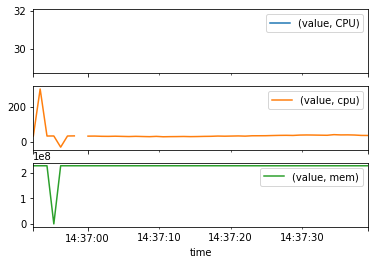

In [15]:
pd.pivot(df_1, index='time', columns='name').plot(subplots=True)

In [17]:
df_1.query('name == "cpu" & (value < 0 | value > 100)')

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


In [23]:
mem = df_1[df_1['name'] == 'mem']['value']
#mem_c = df_1[df_1['name'] == 'mem']
#print(mem.shape)

(50,)


In [38]:
z_score = (mem - mem.mean())/mem.std()
#print(z_score.shape)
bad_mem = mem[z_score.abs() > 2]
#good_mem = mem[z_score.abs()<=2]
#print(z_score.abs()>2)
df_1.loc[bad_mem.index]

,time,name,value
6,2021-07-13 14:36:55.251,mem,295.0


In [39]:
df_2 = pd.read_csv('cart_1.csv',parse_dates=['date'])
print(df_2)

        date    name  amount  price
0 2021-03-01  carrot       7   5.73
1 2021-03-01     egg      12   1.70
2 2021-03-01     egg      12   1.20
3 2021-03-01    milk       1   3.57
4 2021-03-02  potato       3   2.17
5 2021-03-02  potato       3   2.17


In [40]:
df_2.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [42]:
df_2.duplicated(['date','name'])

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [43]:
df_3 = pd.read_csv('ships.csv')
df_3

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


In [44]:
df_3.dtypes

name     object
lat     float64
lng     float64
dtype: object

In [46]:
import pandera as pa
import numpy as np

In [49]:
schema = pa.DataFrameSchema({
    'name': pa.Column(pa.String),
    'lat': pa.Column(pa.Float,nullable=True),
    'lng': pa.Column(pa.Float,nullable=True),
})

In [50]:
schema.validate(df_3)

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN
